<a href="https://colab.research.google.com/github/tshiven/Codemy_Pytorch/blob/main/Codemy_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [266]:
import torch
import numpy as np

Tensors - similar to numpy arrays but more suitable for GPUs and have default data type of float32.

In [267]:
tensor_2d = torch.rand(3,4)
tensor_2d

tensor([[0.0517, 0.7967, 0.9703, 0.5379],
        [0.3032, 0.3835, 0.1268, 0.6430],
        [0.7084, 0.3979, 0.2542, 0.7608]])

In [268]:
tensor_3d = torch.ones(3,4,1)
tensor_3d

tensor([[[1.],
         [1.],
         [1.],
         [1.]],

        [[1.],
         [1.],
         [1.],
         [1.]],

        [[1.],
         [1.],
         [1.],
         [1.]]])

In [269]:
np1 = np.random.rand(3,4) #in random.rand, u don't need tuple unlike others like ones
np1

array([[0.4954517 , 0.83999037, 0.22882773, 0.23903636],
       [0.94509919, 0.8811801 , 0.9324236 , 0.53425342],
       [0.18879543, 0.28899087, 0.19212682, 0.4799046 ]])

In [270]:
my_tensor = torch.tensor(np1) #gets dtype from np
my_tensor

tensor([[0.4955, 0.8400, 0.2288, 0.2390],
        [0.9451, 0.8812, 0.9324, 0.5343],
        [0.1888, 0.2890, 0.1921, 0.4799]], dtype=torch.float64)

In [271]:
my_tensor = torch.arange(-5,5,1)
my_tensor

tensor([-5, -4, -3, -2, -1,  0,  1,  2,  3,  4])

In [272]:
my_tensor.reshape(2,-1) #for one dimension

tensor([[-5, -4, -3, -2, -1],
        [ 0,  1,  2,  3,  4]])

In [273]:
#View and reshape are very similar except they differ when it comes to contiguity.
#Transposing or slicing makes it uncontigous

#Building a simple neural network

In [274]:
import torch.nn as nn #importing a neural network
import torch.nn.functional as F

In [275]:
#Create a model clas that inherits nn.Module
class Model(nn.Module):
  #Input Layer(4 features of the flower). --> H1 --> H2 --> Output(3 classes of iris)
  def __init__(self, in_features = 4, h1 = 8, h2 = 9, out_features =3):
    super().__init__() #runs our nn.Module
    self.fc1 = nn.Linear(in_features,h1) #fc is fully connected (like a neutron), linear represents a linear transformation
    self.fc2 = nn.Linear(h1,h2)
    self.out = nn.Linear(h2,out_features)

  def forward(self, x):
    #basically it goes through each layer
    x = F.relu(self.fc1(x)) #if its less than 0, it becomes 0 otherwise it is the value given
    x = F.relu(self.fc2(x))
    x = F.relu(self.out(x))
    return x

In [276]:
#Giving it a manual seed so that u get somewhat specific random numbers
torch.manual_seed(41)

#Create an instance of our model
model = Model()

#Importing our dataset

In [277]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [278]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
df = pd.read_csv(url)

In [279]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [280]:
df.tail() #gives last 5 instances while .head() gives first 5

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [281]:
df['species'] = df['species'].replace('setosa',0)     #replacing last column with codes for ML
df['species'] = df['species'].replace('versicolor',1)
df['species'] = df['species'].replace('virginica',2)
df

/tmp/ipython-input-904842848.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['species'] = df['species'].replace('virginica',2)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [282]:
#Train test split! Set X,y
#.drop removes certain columns, axes etc.

X = df.drop('species', axis = 1) #drops the species columns in axis 1 since we want to predict species
y = df['species'] #y is the species now

In [283]:
X = X.values
y = y.values

In [284]:
y #number for species

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [285]:
from sklearn.model_selection import train_test_split # this helps split data into train and test for ML

In [286]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 41) #20% - testing data, 80% - training data random_state for similar randomization

In [287]:
#Convert X features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [288]:
#Convert Y features to long tensors
y_train = torch.LongTensor(y_train) #We want integers
y_test = torch.LongTensor(y_test)

In [289]:
#Set the criterion of model to measure the error, how far we r from reality..its like error calculation
criterion = nn.CrossEntropyLoss()

#Choose Adam Optimizer, le - learning rate (if error doesn't go down after a bunch of iterations (epochs), we may want to reduce our learning rate)
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01) #lr directly proportional to time taken for learning, parameters = fc1, fc2, out

In [290]:
print(model.parameters)

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>


In [291]:
#Train our model
#Epochs - one thru all the training data in our network
epochs = 100
losses = []
for i in range(epochs):
  #go forward and get a prediction
  y_pred = model.forward(X_train) #Get predicted results

  #Measure the error, gonna be high lol
  loss = criterion(y_pred, y_train) #predicted v. train

  #Keep track of losses
  losses.append(loss.detach().numpy())

  #print every 10 epochs
  if i%10 == 0:
    print(f'Epoch : {i} and loss: {loss}')

  #Do some back propagation: take the forward error and u feed it back to tweak the weights to leanr better by seeing what wieght changes what
  optimizer.zero_grad() #clears previous gradients
  loss.backward() #computes loss for all parameters
  optimizer.step() #updates parameters

Epoch : 0 and loss: 1.1251550912857056
Epoch : 10 and loss: 1.0096259117126465
Epoch : 20 and loss: 0.8512223958969116
Epoch : 30 and loss: 0.654869019985199
Epoch : 40 and loss: 0.4490566551685333
Epoch : 50 and loss: 0.2707386612892151
Epoch : 60 and loss: 0.15461841225624084
Epoch : 70 and loss: 0.09299226105213165
Epoch : 80 and loss: 0.06447025388479233
Epoch : 90 and loss: 0.050585027784109116


Text(0.5, 0, 'epochs')

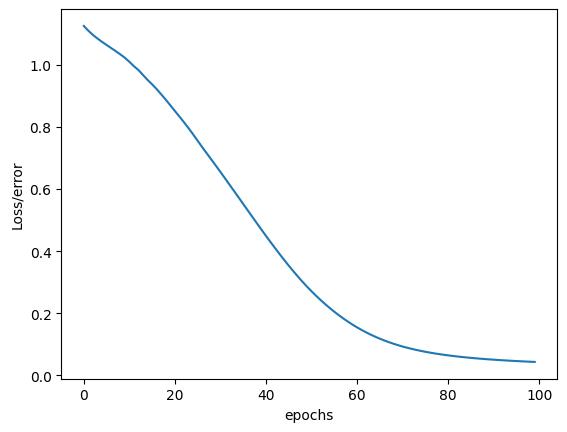

In [292]:
#Graphing
plt.plot(range(epochs), losses)
plt.ylabel("Loss/error")
plt.xlabel('epochs')

In [293]:
#Evaluate Model on Test Data Set (validate model on test set)

with torch.no_grad(): #bye bye backpropagation (turns off)
  y_eval = model.forward(X_test) #X_test are features from our test_set, y_eval will be predictions
  loss = criterion(y_eval, y_test) #find loss
loss

tensor(0.1296)

In [294]:
correct = 0
with torch.no_grad():
  for i,data in enumerate(X_test):
    y_val = model.forward(data)

    #will tell us what type of flower this is
    print(f'{i+1}. {str(y_val)} \t {y_val.argmax().item()} \t  {y_test[i]}')

    #Correct or not
    if y_val.argmax().item() == y_test[i]:
      correct +=1
print(f'We got {correct} correct.')
print(f' We got {round(100 * correct/len(y_test),2)} % correct.')

1. tensor([0.0000, 7.4818, 9.9517]) 	 2 	  2
2. tensor([ 0.0000,  7.7416, 14.4150]) 	 2 	  2
3. tensor([ 0.0000,  9.1741, 15.2260]) 	 2 	  2
4. tensor([0.2420, 8.3711, 4.5725]) 	 1 	  1
5. tensor([ 0.0000,  8.4455, 12.5213]) 	 2 	  2
6. tensor([1.6580, 8.0895, 2.0248]) 	 1 	  1
7. tensor([0.0000, 8.1067, 9.3146]) 	 2 	  2
8. tensor([0.3616, 8.4538, 4.3424]) 	 1 	  1
9. tensor([ 0.0000,  8.2779, 10.8831]) 	 2 	  2
10. tensor([ 0.0000,  8.2340, 15.2944]) 	 2 	  2
11. tensor([0.0000, 8.0207, 8.7722]) 	 2 	  2
12. tensor([9.0044, 3.5022, 0.0000]) 	 0 	  0
13. tensor([8.0835, 3.2078, 0.0000]) 	 0 	  0
14. tensor([2.2655, 6.5108, 0.4715]) 	 1 	  1
15. tensor([8.0545, 3.9531, 0.0000]) 	 0 	  0
16. tensor([0.0000, 8.1667, 8.0483]) 	 1 	  2
17. tensor([8.3930, 3.3382, 0.0000]) 	 0 	  0
18. tensor([0.0000, 7.6729, 9.5912]) 	 2 	  1
19. tensor([8.6390, 3.3854, 0.0000]) 	 0 	  0
20. tensor([7.5293, 3.3366, 0.0000]) 	 0 	  0
21. tensor([2.0055, 7.1311, 1.1164]) 	 1 	  1
22. tensor([ 0.0000,  8.4883

In [296]:
new_iris = torch.tensor([4.7,3.2,1.3,0.2])

In [304]:
with torch.no_grad():
  print(model(new_iris).argmax().item())

0


In [300]:
newer_iris = torch.tensor([5.9,3.0,5.1,1.8])

In [305]:
with torch.no_grad():
  print(model(newer_iris).argmax().item())

2
